In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader as web
import pprint
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm

In [2]:
from datetime import datetime
amzn = web.DataReader("AMZN","quandl",
                      datetime(2005,1,1),
                      datetime(2015,1,1),
                      access_key = 'RGqizhsWNp9P1gM7wx5u'
                     ).sort_index()
ts.adfuller(amzn['AdjClose'],1)


(-0.5026540640718635,
 0.8914975322764596,
 1,
 2515,
 {'1%': -3.4329527780962255,
  '5%': -2.8626898965523724,
  '10%': -2.567382133955709},
 13867.020604373796)

In [3]:
GOOG = web.get_data_yahoo('GOOG')
AAPL = web.get_data_yahoo('AAPL')
INPX = web.get_data_yahoo('INPX')

In [4]:
from numpy import cumsum,log,polyfit,sqrt,std,subtract
from numpy.random import randn
def hurst(ts):
    lags = range(2,200)
    tau = [sqrt(std(subtract(ts[lag:],ts[:-lag]))) for lag in lags]
    #std标准差计算，sub
    poly = polyfit(log(lags),log(tau),1)
    return poly[0]*2.0

gbm = log(cumsum(randn(100000)) + 1000)
mr = log(randn(100000) + 1000)
tr = log(cumsum(randn(100000) + 1)+1000)

print("Hurst(GBM): %s" % hurst(gbm))
print("Hurst(MR): %s" % hurst(mr))
print("Hurst(TR): %s" % hurst(tr))

Hurst(GBM): 0.5031711116206732
Hurst(MR): -7.531382489185033e-07
Hurst(TR): 0.9619252721221243


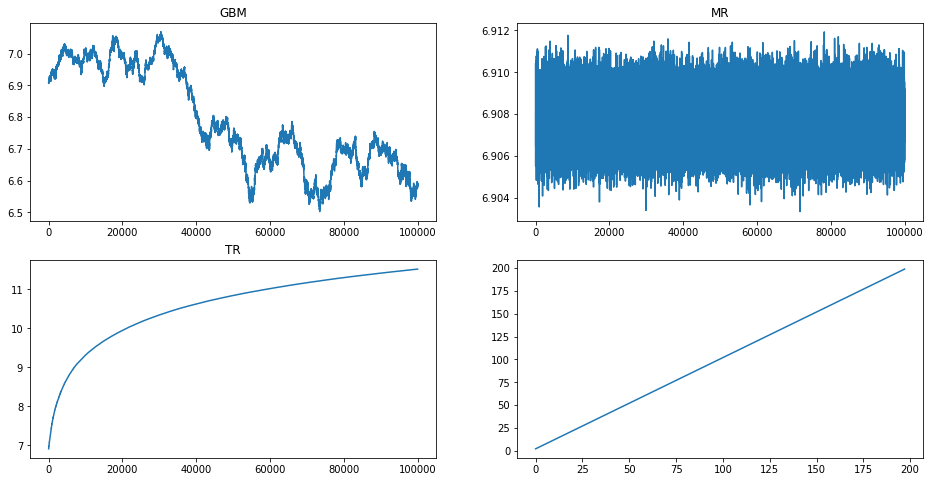

In [5]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.plot(gbm)
ax1.set_title("GBM")
ax2.plot(mr)
#ax2.plot(gbm.rolling(125).mean(),color = 'red')
ax2.set_title("MR")
ax3.plot(tr)
ax3.set_title("TR")
lags = range(2,200)
ax4.plot(lags)

In [6]:
print("Hurst(AMZN) %s" % hurst(amzn['AdjClose']))

Hurst(AMZN) 0.4161170961220211


In [7]:
cumsum(randn(10))

array([ 0.04830353, -0.60589527, -1.49170985, -0.0098362 , -1.66082947,
       -1.0162592 , -1.24376855, -1.5861221 , -2.47963571, -1.09625067])

In [21]:
lags = range(2,200)
tau = (sqrt(std(subtract(ts[:-lag]))) for lag in lags)

In [9]:
def plot_price_series(df,ts1,ts2):
    months = mdates.MonthLocator()
    fig,ax = plt.subplots()
    ax.plot(df.index,df[ts1],label = ts1)
    ax.plot(df.index,df[ts2],label = ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_xlim(datetime.datetime(2012,1,1),datetime.datetime(2013,1,1))
    ax.grid(True)
    fig.autofmt_xdate()
    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Price' % (ts1,ts2))
    plt.legend()
    plt.show()

def plot_scatter_series(df,ts1,ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1,ts2))
    plt.scatter(df[ts1],df[ts2])
    plt.show()
    
def plot_residuals(df):
    months = mdates.MonthLocator()
    fig,ax = plt.subplots()
    ax.plot(df.index,df["res"],label = "Residuals")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_xlim(datetime.datetime(2012,1,1),datetime.datetime(2013,1,1))
    ax.grid(True)
    fig.autofmt_xdate()
    plt.xlabel('Monat/Year')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()
    plt.plot(df["res"])
    plt.show()

G:\application\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


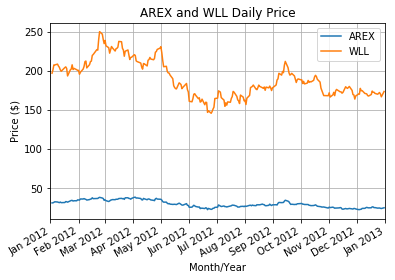

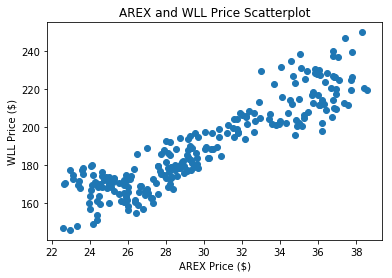

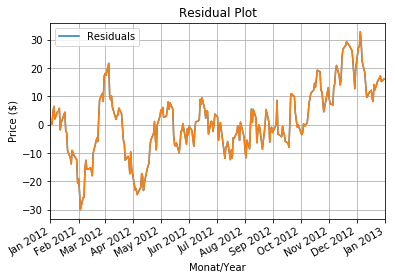

(-2.6399513265084398,
 0.08501801232987727,
 0,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 1324.492947676295)


In [11]:
import datetime
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2013,1,1)
arex = web.DataReader('AREX','quandl',start,end,access_key = 'RGqizhsWNp9P1gM7wx5u').sort_index()
wll = web.DataReader('WLL','quandl',start,end,access_key = 'RGqizhsWNp9P1gM7wx5u').sort_index()
df = pd.DataFrame(index= arex.index)
df["AREX"] = arex["AdjClose"]
df["WLL"] = wll["AdjClose"]
plot_price_series(df,"AREX","WLL")
plot_scatter_series(df,'AREX',"WLL")
y = df['WLL']
x = df['AREX']  
res = sm.OLS(y,x).fit()
beta_hr = res.params.AREX
df['res'] = df['WLL'] - beta_hr * df["AREX"]
plot_residuals(df)
cadf = ts.adfuller(df['res'])
pprint.pprint(cadf)

In [1]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import LinearSVC,SVC

In [9]:
def create_lagged_series(symbol,start_date,end_date,lags=5):
    ts = web.DataReader(
    symbol,'quandl',
    start_date-datetime.timedelta(days = 365),
    end_date
    ).sort_index()
    #Create the new lagged
    

In [10]:
help(cumsum)

NameError: name 'cumsum' is not defined

In [8]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.plot(gbm.color = 'red')
ax2.plot(mr)
ax3.plot(tr)

SyntaxError: keyword can't be an expression (<ipython-input-8-05840bf5eb46>, line 6)

In [1]:
plt.plot(gbm)

NameError: name 'plt' is not defined

In [9]:
##分类器

In [7]:
def annualised_shape(returns,N= 252):
    return np.sqrt(N) * returns.mean()/ returns.std()
def equity_shape(ticker,start,end):
    pdf = web.DataReader(ticker,'quandl',start,end).sort_index()